# EDA : 전복

## features
Sex : 전복 성별(i=infant) / object  
Lenght : 전복 길이 / mm / float  
Diameter : 전복 둘레 / mm / float  
Height : 전복 길이 / mm / float  
Whole Weight : 전복 전체 무게 / grams / float  
Shucked Weight : 껍질을 제외한 무게 / grams / float  
Viscra Weight : 내장 무게 / grams / float  
Shell Weight : 껍질 무게 / grams / float  
Rings : 전복 나이 / int  


## Domain
1. 전복의 나이 판단:
전복의 나이는 보통 그것의 껍질에 있는 고리의 수를 세어 판단합니다.
이것이 'Rings' 피처가 가리키는 것입니다.
따라서 'Rings' 피처는 전복의 나이를 직접적으로 예측하는 데 중요한 변수가 될 수 있습니다.

2. 전복의 성장:
전복은 자신의 생명 동안 계속 성장합니다.
따라서 길이, 둘레, 높이, 그리고 무게와 같은 피처들은 전복의 나이와 밀접한 관련이 있을 수 있습니다.
더 크고 무거운 전복일수록 일반적으로 더 오래된 전복일 것입니다.

3. 전복의 성별:
전복은 성별에 따라 다른 성장 패턴과 생리적 특성을 가질 수 있습니다.
예를 들어, 일부 연구에서는 암컷 전복이 수컷 전복보다 더 빨리 성장하고 더 큰 크기에 도달할 수 있다는 것을 발견했습니다.
따라서 'Sex' 피처는 전복의 나이를 예측하는 데 중요한 역할을 할 수 있습니다.

4. 전복의 무게:
전복의 껍질을 제외한 무게 ('Shucked Weight'), 내장 무게 ('Viscera Weight'),
그리고 껍질 무게 ('Shell Weight')는 전복의 전체 무게 ('Whole Weight')를 구성합니다.
이러한 피처들은 전복의 성장과 밀접한 관련이 있을 수 있으며, 따라서 나이 예측에 중요할 수 있습니다.


## Workflow
1. 기본 통계량 확인
2. 결측치 확인
3. 상관 분석
4. 분포 확인
5. 카테고리별 분석
6. 피처 중요도 분석


## Reference
- https://archive.ics.uci.edu/ml/datasets/abalone
- https://www.kaggle.com/code/anmolbajpai/abalone-age-prediction-regression
- https://rpubs.com/shihui17170153/abalone
- https://rstudio-pubs-static.s3.amazonaws.com/378381_1221e0d1034b4020a38a862a76890bb6.html

## Data Load

In [2]:
import pandas as pd

csv_path = '../data/Regression_data.csv'
df = pd.read_csv(csv_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.to_markdown()

'|      | Sex   |   Length |   Diameter |   Height |   Whole weight |   Shucked weight |   Viscera weight |   Shell weight |   Rings |\n|-----:|:------|---------:|-----------:|---------:|---------------:|-----------------:|-----------------:|---------------:|--------:|\n|    0 | M     |    0.455 |      0.365 |    0.095 |         0.514  |           0.2245 |           0.101  |         0.15   |      15 |\n|    1 | M     |    0.35  |      0.265 |    0.09  |         0.2255 |           0.0995 |           0.0485 |         0.07   |       7 |\n|    2 | F     |    0.53  |      0.42  |    0.135 |         0.677  |           0.2565 |           0.1415 |         0.21   |       9 |\n|    3 | M     |    0.44  |      0.365 |    0.125 |         0.516  |           0.2155 |           0.114  |         0.155  |      10 |\n|    4 | I     |    0.33  |      0.255 |    0.08  |         0.205  |           0.0895 |           0.0395 |         0.055  |       7 |\n|    5 | I     |    0.425 |      0.3   |    0.095 |   

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


## Target

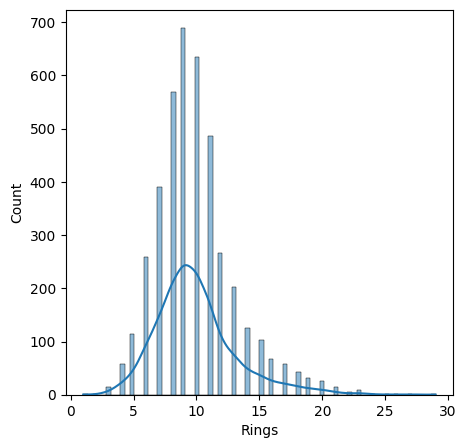

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(5, 5))
sns.histplot(df.Rings, kde=True)

plt.show()
save_path = '../../../../../Git_Blog/assets/images/aib/GPTeachersDay/abalone_target.png'
fig.savefig(save_path, dpi=80, bbox_inches='tight')

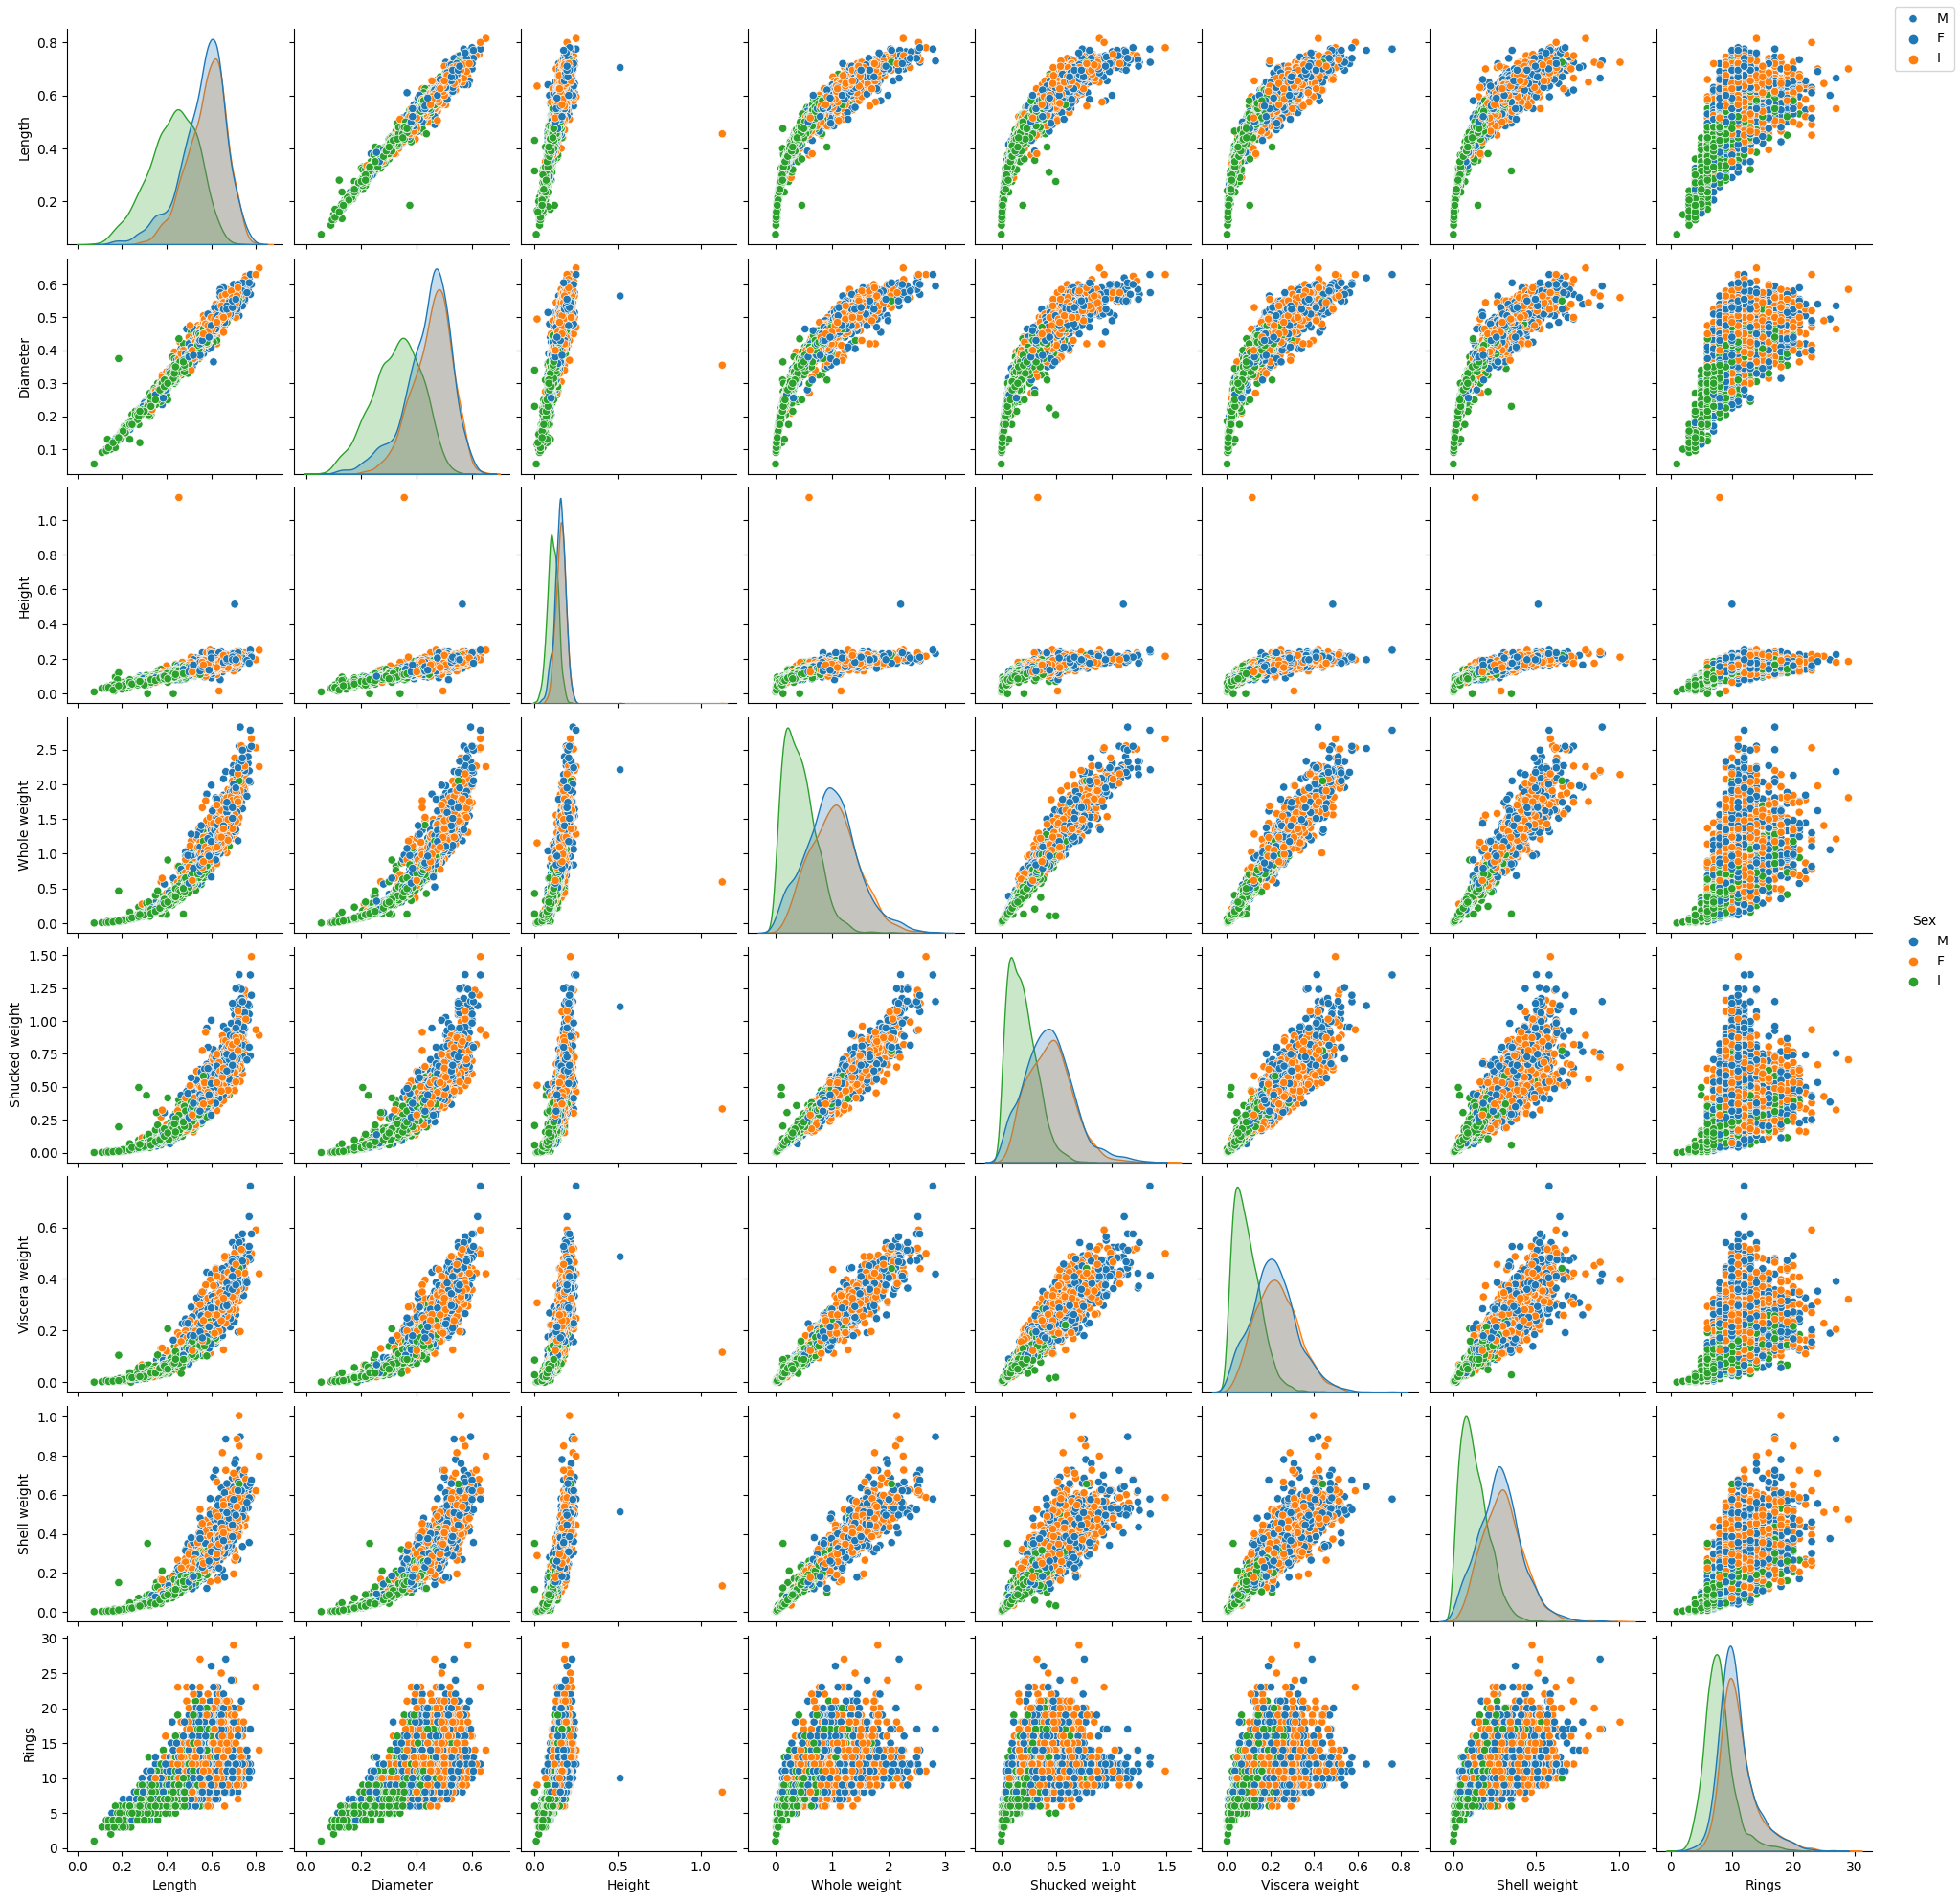

In [25]:
g = sns.pairplot(df, hue='Sex')
g.fig.legend(labels = ["M","F","I"], loc='upper right', ncol=1)

plt.show()
save_path = '../../../../../Git_Blog/assets/images/aib/GPTeachersDay/abalone_pairplot.png'
g.savefig(save_path, dpi=80, bbox_inches='tight')

C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_64028\4260430108.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdYlBu_r", annot=True)


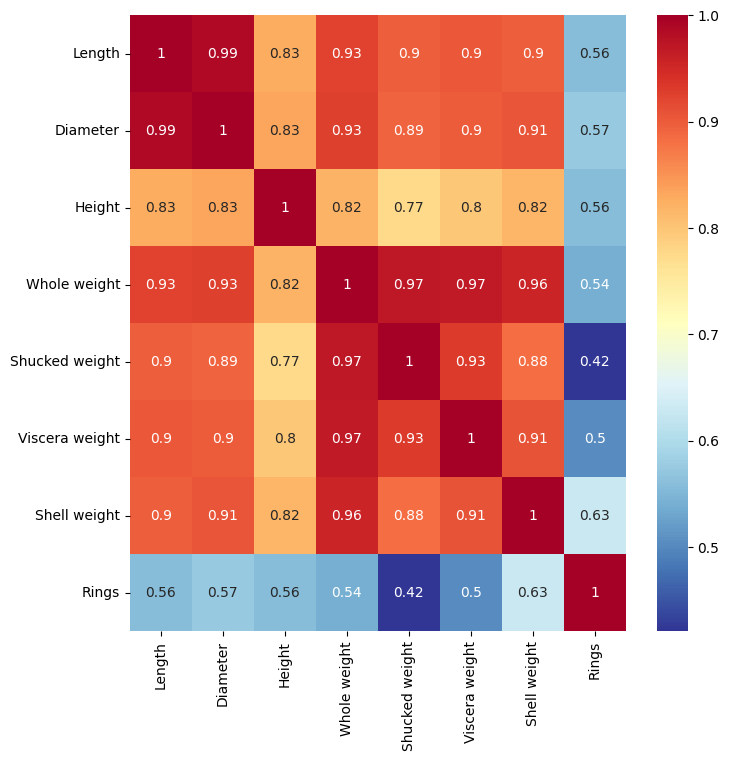

In [24]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="RdYlBu_r", annot=True)

plt.show()
save_path = '../../../../../Git_Blog/assets/images/aib/GPTeachersDay/abalone_heatmap.png'
fig.savefig(save_path, dpi=80, bbox_inches='tight')

## Export Report

In [23]:
from ydata_profiling import ProfileReport
df_report = ProfileReport(df, title='Abalone Profile Report')
df_report.to_file('eda_abalone.html')

C:\Users\leeyeonjun85\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


## Predict Model

In [22]:
dfCopy=pd.get_dummies(df,columns=['Sex'])
dfCopy.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [92]:

y = dfCopy['Rings']
X = dfCopy.drop(['Rings'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, )

(2923, 10) (1254, 10) (2923,) (1254,)


In [119]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression

def get_metrics(model, X, y):
    y_pred=model.predict(X)
    print('r2_score      :', metrics.r2_score(y, y_pred))
    print('Mean Absolute Error      :', metrics.mean_absolute_error(y, y_pred))
    print('Mean Squared Error       :', metrics.mean_squared_error(y, y_pred))
    print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [123]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
model=LinearRegression() # initialzing the model
model.fit(X_train, y_train)

print(f'Train Data')
get_metrics(model, X_train, y_train)


print(f'\nTest Data')
get_metrics(model, X_test, y_test)

Train Data
r2_score      : 0.5371767499523019
Mean Absolute Error      : 1.5947763427984947
Mean Squared Error       : 4.960725557873439
Root Mean Squared Error  : 2.2272686317266355

Test Data
r2_score      : 0.5344870221974762
Mean Absolute Error      : 1.5724930223285487
Mean Squared Error       : 4.476721561316288
Root Mean Squared Error  : 2.1158264487703824


In [121]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor (random_state=42)
model.fit(X_train, y_train)

print(f'Train Data')
get_metrics(model, X_train, y_train)


print(f'\nTrain Data')
get_metrics(model, X_test, y_test)

Train Data
r2_score      : 0.9366635345078664
Mean Absolute Error      : 0.5793362983236401
Mean Squared Error       : 0.6788656859391037
Root Mean Squared Error  : 0.8239330591371509

Train Data
r2_score      : 0.5305171274945955
Mean Absolute Error      : 1.5287400318979265
Mean Squared Error       : 4.514899043062201
Root Mean Squared Error  : 2.1248291797370915


In [125]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor (random_state=42)
model.fit(X_train, y_train)

print(f'Train Data')
get_metrics(model, X_train, y_train)


print(f'\nTest Data')
get_metrics(model, X_test, y_test)

Train Data
r2_score      : 0.6737824701469084
Mean Absolute Error      : 1.3426775489240597
Mean Squared Error       : 3.49653056021234
Root Mean Squared Error  : 1.869901216698984

Test Data
r2_score      : 0.5451261227466433
Mean Absolute Error      : 1.5062033940812545
Mean Squared Error       : 4.374407999519795
Root Mean Squared Error  : 2.0915085463654686


In [126]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                704       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [97]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 56ms/step


array([[ 0.0250915 ],
       [ 0.07022133],
       [-0.17951182],
       [ 0.06846764],
       [ 0.07947111],
       [-0.0679324 ],
       [-0.07538085],
       [-0.06151308],
       [ 0.0785764 ],
       [-0.19829437]], dtype=float32)

In [98]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  X_train, y_train,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS,
  callbacks=[PrintDot()])


....................................................................................................

In [99]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,4.639424,1.524770,4.639424,5.123271,1.631414,5.123271,95
96,4.586134,1.528145,4.586134,5.339123,1.587460,5.339123,96
97,4.578706,1.512439,4.578706,5.441050,1.594948,5.441050,97
98,4.619239,1.518944,4.619239,7.688579,2.255639,7.688579,98
99,4.673106,1.538957,4.673106,4.797848,1.479658,4.797848,99


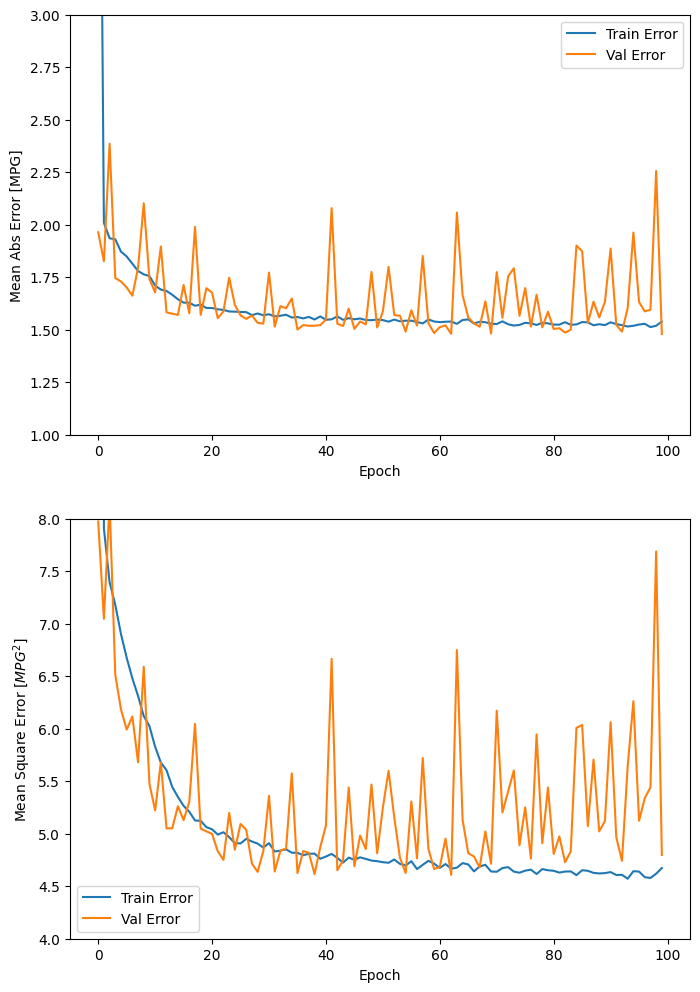

In [100]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([1,3])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([4,8])
  plt.legend()
  plt.show()

plot_history(history)

40/40 [==============================] - 0s 2ms/step


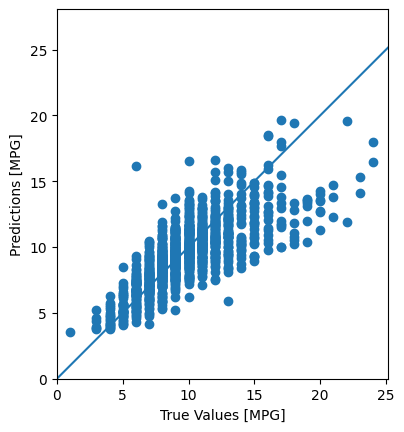

In [101]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

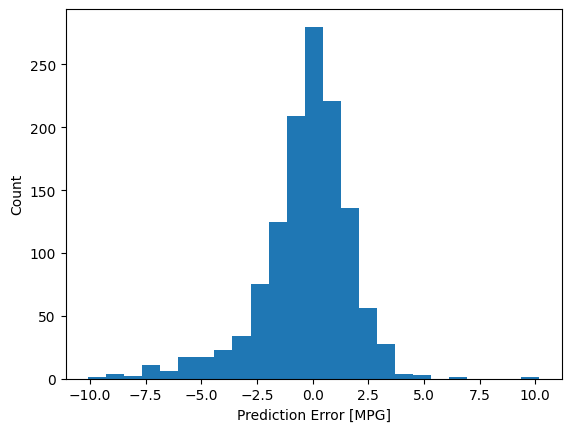

In [102]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")